In [1]:
from lrp_update import query_openet

In [2]:
# Create an Openet object with a path to the database and the api key
path_to_folder_with_data = 'data'
api_key = 'cKF3SgsGxmGERTbqtuoUFh8gu35FcVAtGpaAtnjfmV32EHl2Jur05wT9BPWz'

open_et_obj = query_openet.OpenetApi.from_file(path_dataset=path_to_folder_with_data,
                                     fn_key='data/CH_OpenET_APIkey.txt')



In [3]:
# Query the database and if necessary update the local dataset 

# UPDATE ET
query_et = {
    "variable": "ET",
    "start_date": "2018-01-01",
    "end_date": "2024-06-30",
    "interval": "monthly",
    "model": "ensemble",
    "reducer": "mean",
    "reference_et": "cimis",
    "units": "in",
    "attributes": ["EKIfld",],
    "asset_id": "projects/ee-csheppner/assets/Year1_enrolled_repurposed",                
}

open_et_obj.update_local_dataset(**query_et)

# UPDATE ET
query_pp = {
    "variable": "pr",
    "start_date": "2018-01-01",
    "end_date": "2024-06-30",
    "interval": "monthly",
    "model": "ensemble",
    "reducer": "mean",
    "reference_et": "cimis",
    "units": "in",
    "attributes": ["EKIfld",],
    "asset_id": "projects/ee-csheppner/assets/Year1_enrolled_repurposed",                
}

open_et_obj.update_local_dataset(**query_pp)

Requested data for period 2018-01-01:2024-06-30 extends beyond data available locally for variable ET
Requesting new available data for ET...
Request Successful. Retrieving data
Requested data for period 2018-01-01:2024-06-30 extends beyond data available locally for variable pr
Requesting new available data for pr...
Request Successful. Retrieving data


Creating report with the following information
LRPAgreementNumber  00001
LRPParticipantName  Syam Maradani
AreaofLandRepurposed  73.64 acres
MinimumWaterUseReduction  122.05 AFY
BaselineWaterUse  145.13 AFY
MaximumConsumptiveUse  23.09 AFY
calculating consumptive use for 0    4
1    9
Name: EKIfld, dtype: int64


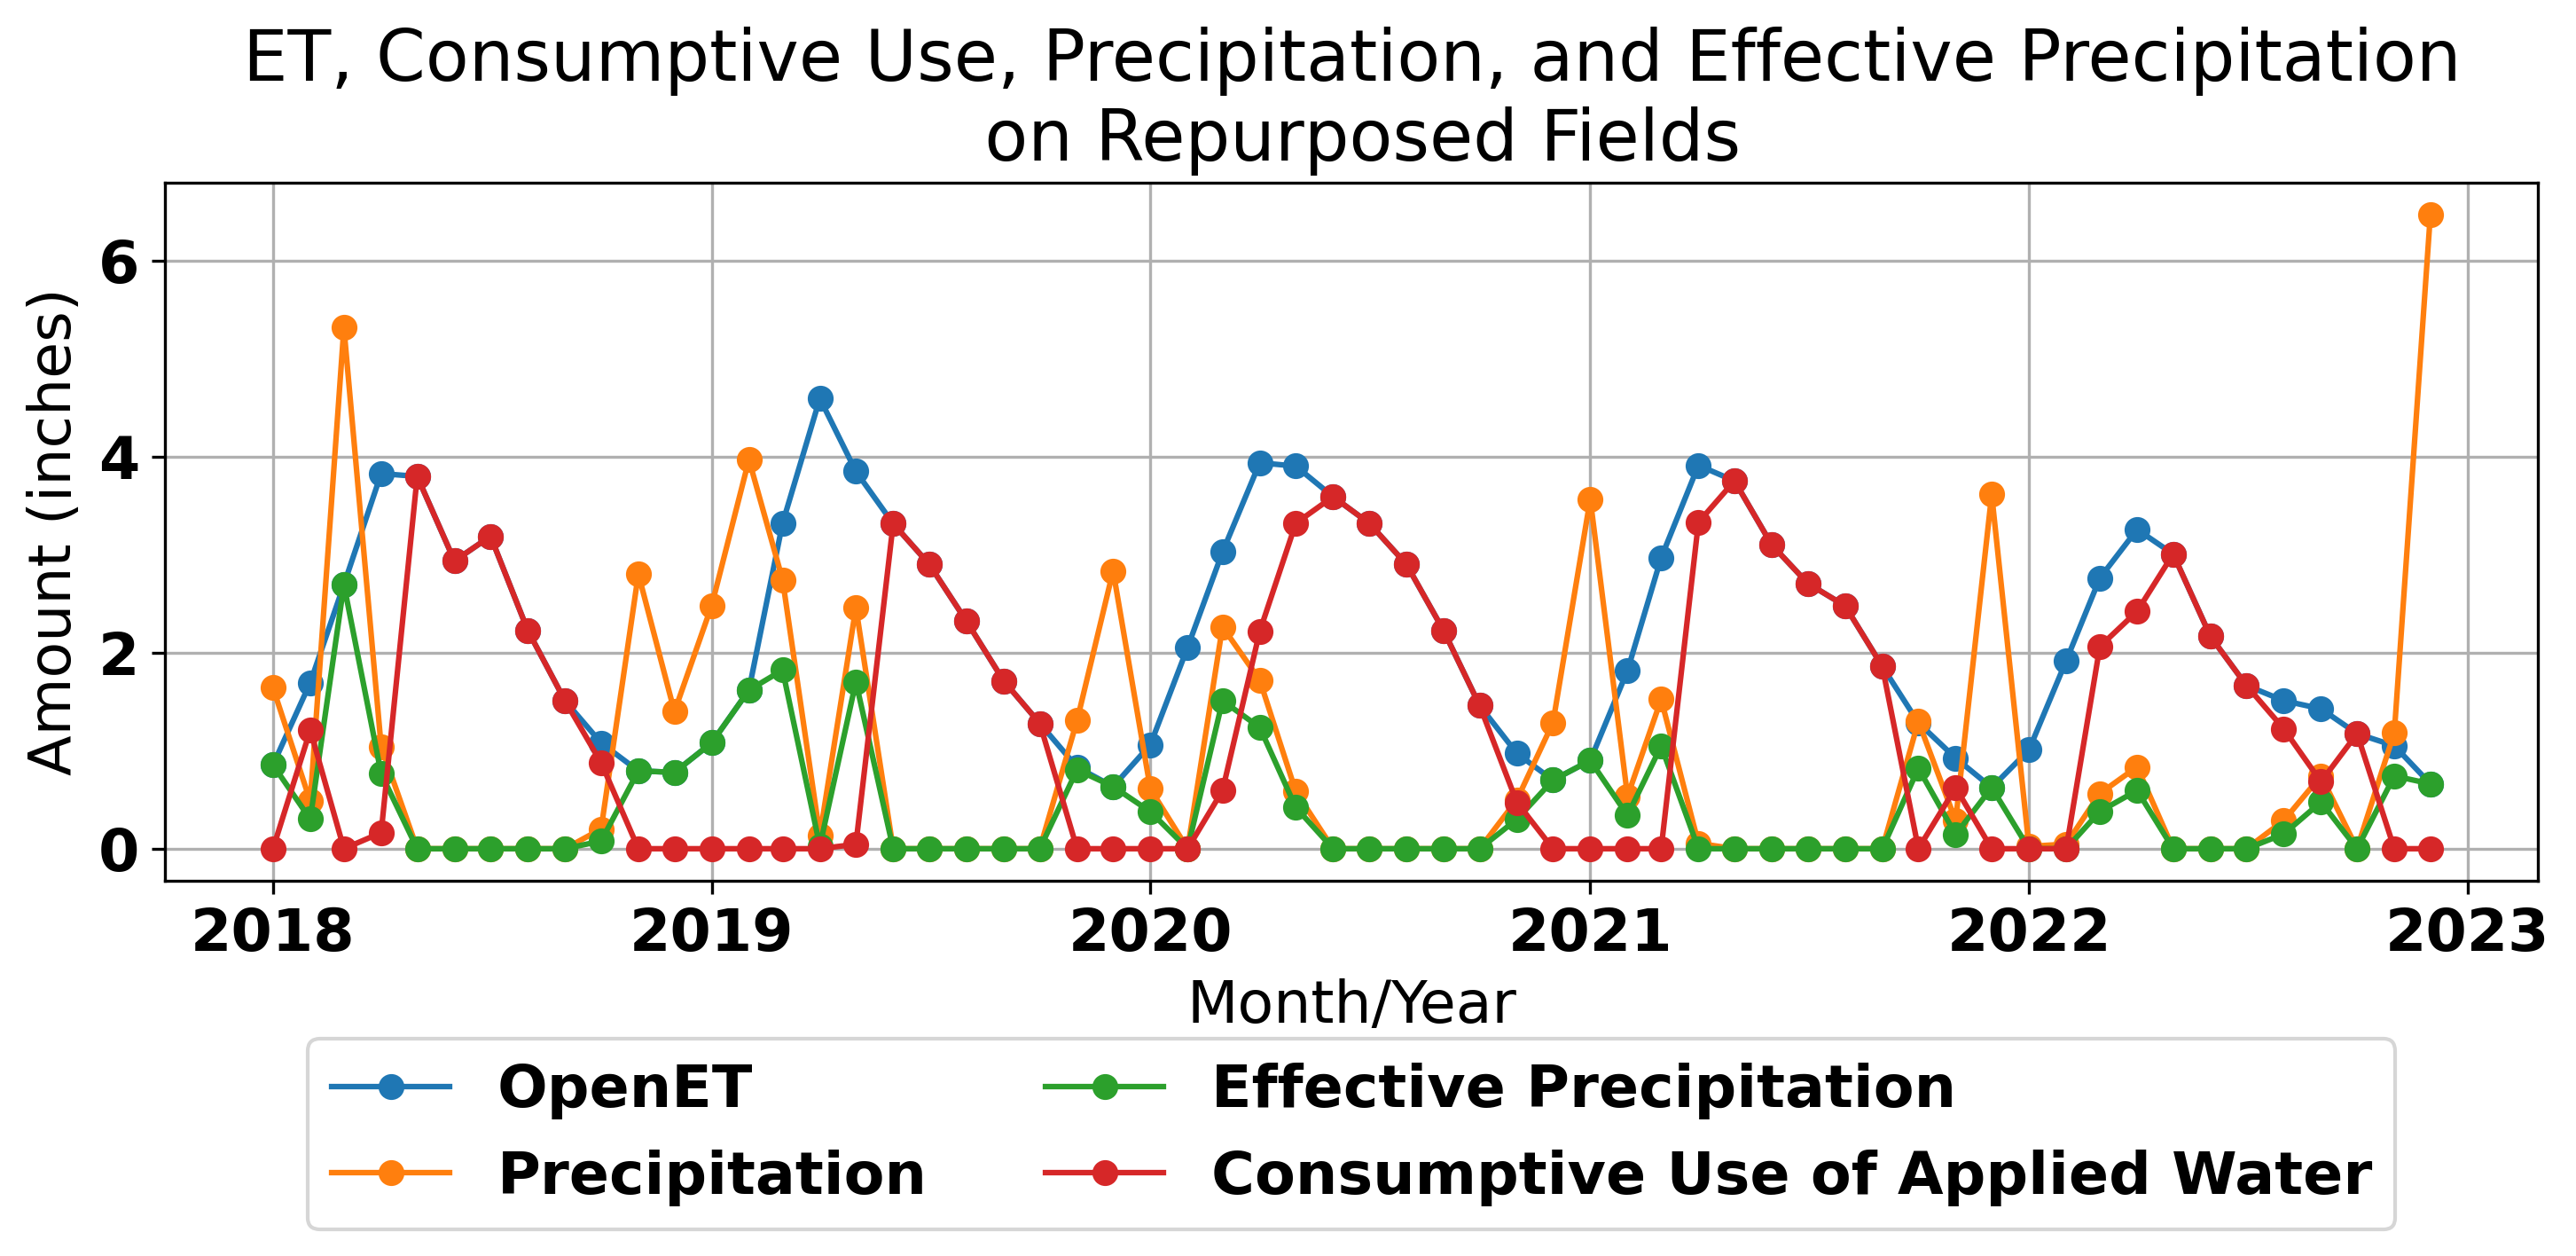

In [6]:
# Conduct data analysis and generate report from pdf 

pdf_report = "./reports/WY2023_Q1_qtrly_report_00001_Maradani.pdf"

report = query_openet.GenerateLrpReport.from_pdf_template(pdf_report)
smb = report.generate_lrp_report(fn_pp='./data/Year1_enrolled_repurposed_pr.csv',
                                 fn_et='./data/Year1_enrolled_repurposed_ET.csv',
                                 fn_fld_key='./data/EKIfld_IDs_key.csv',
                                 water_year=2023,
                                 quarter="Q1",
                                 fn_report_out="./reports/test_report_Maradani.pdf"
                                 )

# save the 
smb.save_consumptive_use_to_csv("reports")
